In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



In [5]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df=pd.read_csv('/content/drive/MyDrive/housing.csv',names=names,header=None,delimiter=r"\s+")


In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [53]:
array=df.values


In [54]:
X =array[:,0:13]
Y=array[:,13]

In [10]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [11]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [12]:
print(df.shape)

(506, 14)


In [13]:
print(df.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.groupby('PRICE').size()

PRICE
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
        ..
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 229, dtype: int64

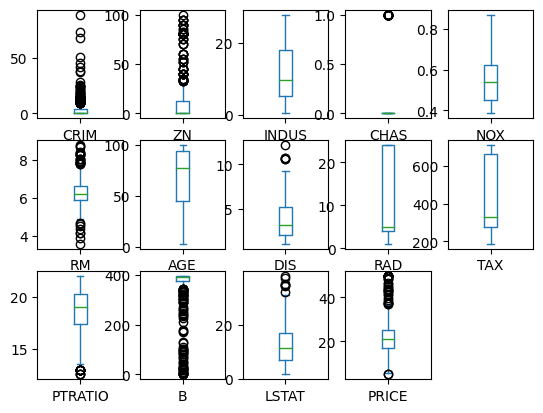

In [16]:
df.plot(kind='box',subplots=True,layout=(3,5), sharex=False, sharey=False)
plt.show()

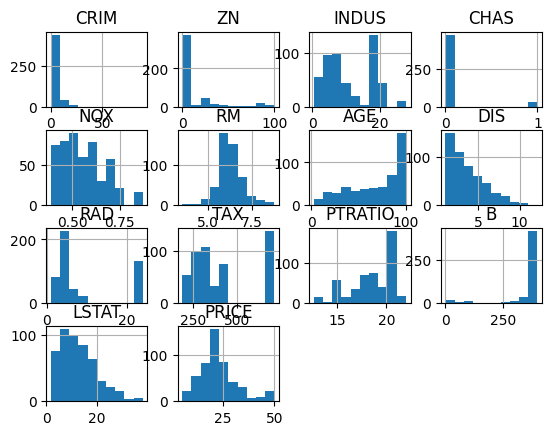

In [17]:
df.hist()
plt.show()
#plt.subplots_adjust(wspace=0.2)


Train Test Split
Model Selection


In [18]:
validation_size = 0.20
seed = 7

In [19]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [20]:
X_train.shape

(404, 13)

In [21]:
from sklearn.model_selection import train_test_split
clf= LinearRegression().fit(X_train,Y_train)
print('Housing dataset')
print ('Accuracy of linear reg on training set: {:.3f}'.format(clf.score(X_train, Y_train)))
print ('Accuracy of linear reg on testing: {:.3f}'.format(clf.score(X_test, Y_test)))

Housing dataset
Accuracy of linear reg on training set: 0.770
Accuracy of linear reg on testing: 0.579


In [22]:
r=clf.predict(X_test[0:1,:])
print('Predicted:{} actual:{}'.format(r,Y_test[0]))

Predicted:[23.01607649] actual:21.7


In [23]:
clf = KNeighborsRegressor().fit(X_train, Y_train)
print('House Prices dataset')
print('Accuracy of K Neighbors Regressor on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of K Neighbors Regressor on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

House Prices dataset
Accuracy of K Neighbors Regressor on training set: 0.71
Accuracy of K Neighbors Regressor on test set: 0.54


In [24]:
clf = DecisionTreeRegressor().fit(X_train, Y_train)
print('House Prices dataset')
print('Accuracy of Decision Tree Regressor on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree Regressor on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

House Prices dataset
Accuracy of Decision Tree Regressor on training set: 1.00
Accuracy of Decision Tree Regressor on test set: 0.58


In [25]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [26]:
clf = linear_model.Lasso().fit(X_train, Y_train)
print('House Prices dataset')
print('Accuracy of Lasso on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Lasso on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

House Prices dataset
Accuracy of Lasso on training set: 0.71
Accuracy of Lasso on test set: 0.64


In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [28]:
clf = linear_model.Ridge().fit(X_train, Y_train)
print('House Prices dataset')
print('Accuracy of Ridge on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of Ridge on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

House Prices dataset
Accuracy of Ridge on training set: 0.77
Accuracy of Ridge on test set: 0.57


In [29]:
r=clf.predict(X_test[0:1,:])
print('Predicted:{} actual:{}'.format(r,Y_test[0]))

Predicted:[23.80154725] actual:21.7


KMeans Clustering


In [30]:
from  sklearn.cluster import KMeans

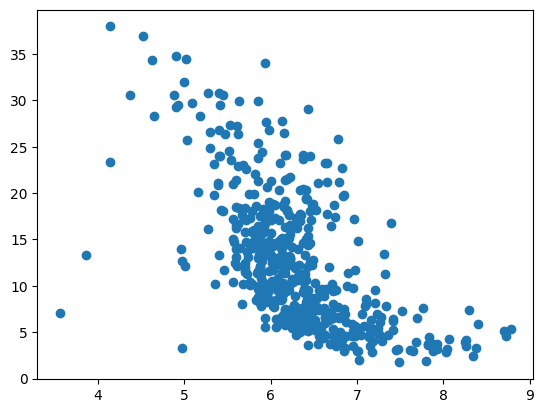

In [31]:
plt.scatter(df['RM'],df['LSTAT'])

In [32]:
kmeans=KMeans(3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [33]:
identify_clusters = kmeans.fit_predict(X)
identify_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

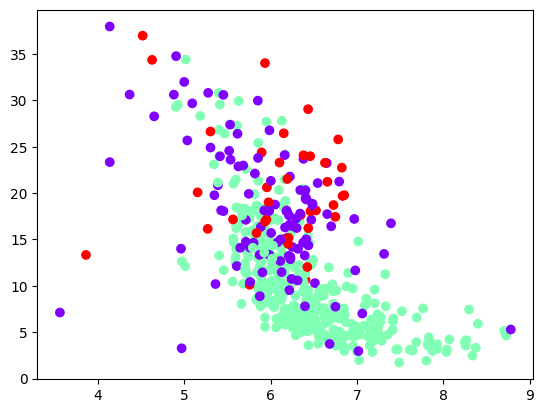

In [34]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identify_clusters
plt.scatter(data_with_clusters['RM'], data_with_clusters['LSTAT'], c=data_with_clusters['Clusters'], cmap='rainbow')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

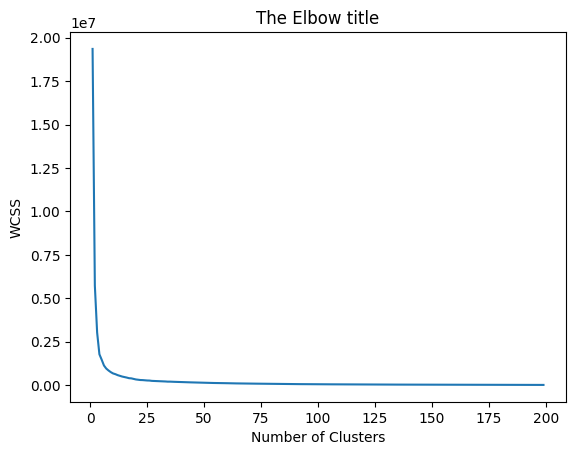

In [35]:
wcss=[]
for i in range (1,200):
 kmeans=KMeans(i)
 kmeans.fit(X)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters =range(1,200)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')


In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=13)
pca.fit(X)
trnsf=pca.transform(X)
trnsf

array([[-1.19818843e+02, -5.56005586e+00, -3.17269264e+00, ...,
         3.78374287e-01, -7.13108946e-02,  3.35451015e-02],
       [-1.68890155e+02,  1.01162086e+01, -3.07818868e+01, ...,
         4.86740794e-02, -9.47343278e-02, -3.31502751e-02],
       [-1.69311707e+02,  1.40805323e+01, -1.67536282e+01, ...,
        -4.67469154e-01, -1.07257460e-01, -4.50902543e-03],
       ...,
       [-1.38387163e+02,  9.38092201e-01, -3.72851813e+01, ...,
        -2.97952531e-01, -1.04654969e-01,  4.30883930e-02],
       [-1.37505173e+02,  4.25182510e+00, -3.59883419e+01, ...,
        -1.94149871e-01, -9.54593524e-02,  4.51072934e-02],
       [-1.39190333e+02,  1.00906423e+00, -2.97724323e+01, ...,
         4.16189839e-01, -7.03283698e-02,  4.55682936e-02]])

In [37]:
pca.explained_variance_ratio_

array([8.05823175e-01, 1.63051968e-01, 2.13486092e-02, 6.95699061e-03,
       1.29995193e-03, 7.27220158e-04, 4.19044539e-04, 2.48538539e-04,
       8.53912023e-05, 3.08071548e-05, 6.65623182e-06, 1.56778461e-06,
       7.96814208e-08])

Text(0, 0.5, 'Cum Varience')

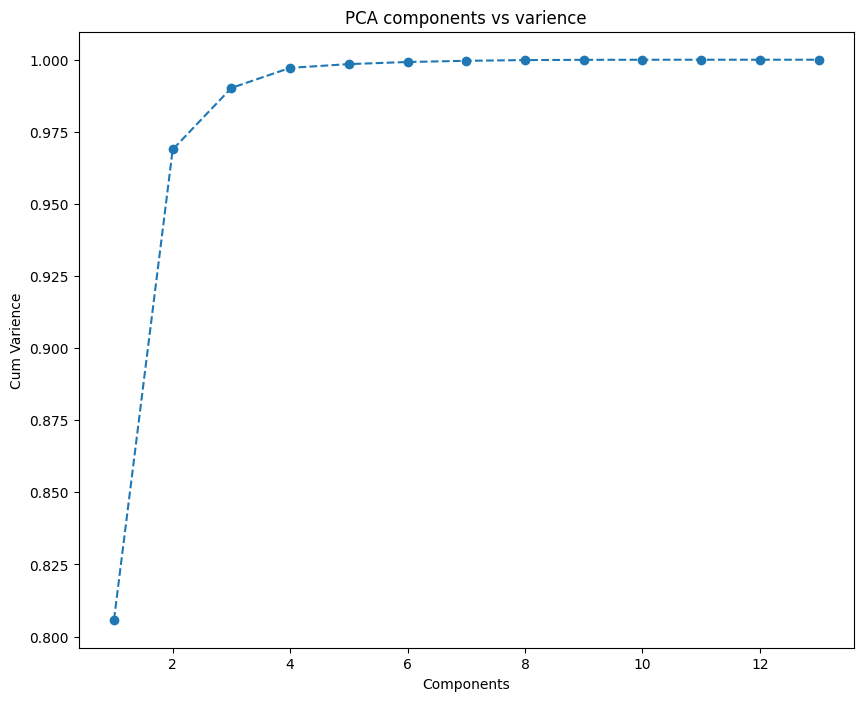

In [56]:
plt.figure(figsize=(10,8))
plt.plot(range(1,14),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('PCA components vs varience')
plt.xlabel('Components')
plt.ylabel('Cum Varience')

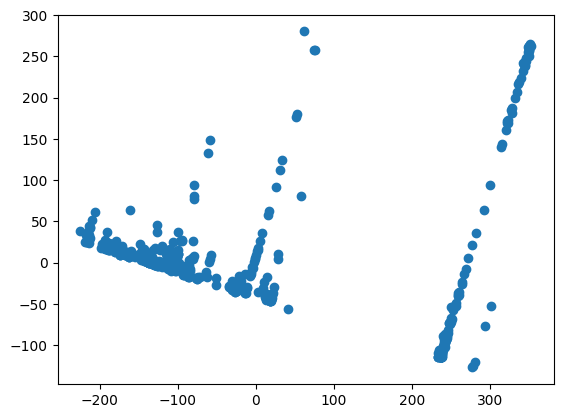

In [42]:
plt.scatter(trnsf[:,0],trnsf[:,1])

In [45]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,verbose=1,perplexity=4,random_state=1)
z=tsne.fit_transform(X)
z

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.001s...
[t-SNE] Computed neighbors for 506 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 5.749350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.001167
[t-SNE] KL divergence after 1000 iterations: 0.342529


array([[-51.464417, -19.375559],
       [-40.49303 ,  44.658916],
       [-39.38114 ,  40.483944],
       ...,
       [ 10.339075, -20.490473],
       [ 10.286336, -20.614323],
       [  9.722683, -17.09339 ]], dtype=float32)

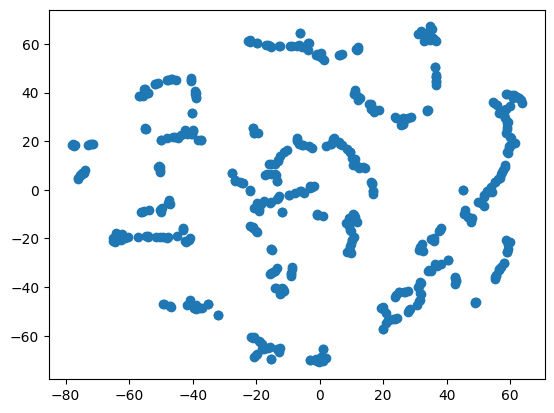

In [46]:
plt.scatter(z[:,0],z[:,1])


In [48]:
kmeans=KMeans(25)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=25)

In [50]:
identify_clusters = kmeans.fit_predict(X)
identify_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([15,  0, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13,  5, 13, 13, 13, 24,
       13, 16, 13, 13, 13, 13, 13, 13, 16, 13, 16, 13, 13, 13, 13, 16, 13,
       16,  0, 15, 15, 15, 23, 23,  8,  8,  8, 18, 18, 18, 18,  6, 18, 18,
       18,  8,  8, 21, 23,  7, 23, 15, 15,  0,  0,  0, 15, 18, 12, 12,  5,
        5,  5, 24, 24, 24, 24,  3,  3, 20,  3,  3,  3, 15,  0, 15, 15, 18,
       18, 18, 18,  0,  0,  0,  0, 15,  8,  0, 15,  0,  0, 15,  0, 20, 20,
       10, 20, 20, 20, 20, 20, 20, 20,  3, 11, 11, 11, 11, 14, 11, 11, 14,
       11,  6,  6,  6,  6,  6,  6,  6, 11, 11, 11, 11, 11, 11, 11,  4, 11,
       11, 11, 11, 11, 11, 11, 20, 20, 20,  4,  4, 20, 14, 14, 20, 14, 14,
        4, 14, 10, 10, 14, 14, 14, 14, 20, 20, 20, 20,  4, 20,  4, 14, 14,
       14, 14, 13, 13, 13, 15, 15, 13, 13,  6,  6,  6,  6,  6,  6,  6,  6,
       21, 21, 21, 21, 21, 21,  7,  7, 23, 12, 12, 12, 21, 21, 12, 12, 23,
       23, 15, 15,  0, 15,  0,  0,  0, 15, 15, 24, 15, 15,  0,  0,  0, 13,
       13, 13, 13, 13, 13

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.002s...
[t-SNE] Computed neighbors for 506 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 5.749350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.001167
[t-SNE] KL divergence after 1000 iterations: 0.342529


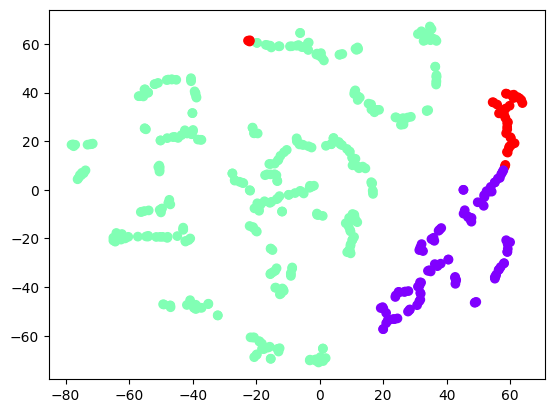

In [52]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,verbose=1,perplexity=4,random_state=1)
z=tsne.fit_transform(X)
z
plt.scatter(z[:,0],z[:,1],c=data_with_clusters['Clusters'],cmap='rainbow')